<a href="https://colab.research.google.com/github/TranTan1410/tuan13/blob/main/10_mon_an.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/btvn3/MON_AN/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 482 images belonging to 10 classes.


In [ ]:
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/btvn3/MON_AN/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 164 images belonging to 10 classes.


In [ ]:
training_data.class_indices

{'BANH LOC': 0,
 'BANH MI': 1,
 'BANH XEO': 2,
 'BUN BO HUE': 3,
 'CA CHIEN': 4,
 'COM SUON': 5,
 'HEO QUAY': 6,
 'HU TIEU': 7,
 'THIT KHO TRUNG': 8,
 'TRUNG': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 512 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                    

In [ ]:
opt=SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(training_data,epochs=500,batch_size=100,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/500
16/16 [==============================] - 179s 10s/step - loss: 2.6073 - accuracy: 0.1037 - val_loss: 2.2970 - val_accuracy: 0.1098
Epoch 2/500
16/16 [==============================] - 7s 453ms/step - loss: 2.2826 - accuracy: 0.1017 - val_loss: 2.2849 - val_accuracy: 0.0915
Epoch 3/500
16/16 [==============================] - 7s 451ms/step - loss: 2.2807 - accuracy: 0.1224 - val_loss: 2.2873 - val_accuracy: 0.0793
Epoch 4/500
16/16 [==============================] - 7s 455ms/step - loss: 2.2796 - accuracy: 0.1079 - val_loss: 2.2896 - val_accuracy: 0.0793
Epoch 5/500
16/16 [==============================] - 8s 489ms/step - loss: 2.2775 - accuracy: 0.1183 - val_loss: 2.3015 - val_accuracy: 0.0732
Epoch 6/500
16/16 [==============================] - 7s 456ms/step - loss: 2.2646 - accuracy: 0.1266 - val_loss: 2.3006 - val_accuracy: 0.0732
Epoch 7/500
16/16 [==============================] - 7s 451ms/step - loss: 2.2605 - accuracy: 0.1494 - val_loss: 2.2985 - val_accuracy: 0.1098

<function matplotlib.pyplot.show>

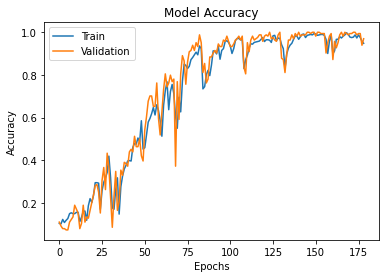

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Final.h5")

In [ ]:
model_CNN=load_model('Final.h5')

BANH LOC


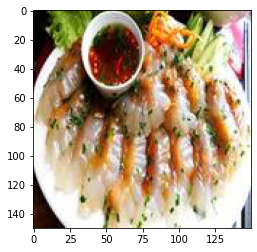

In [ ]:
img=load_img('/content/drive/MyDrive/btvn3/MON_AN/test/BANH LOC/images (2).jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='BANH LOC'
elif round(result[0][1])==1:
  prediction='BANH MI'
elif round(result[0][2])==1:
  prediction='BANH XEO'
elif round(result[0][3])==1:
  prediction='BUN BO HUE'
elif round(result[0][4])==1:
  prediction='CA CHIEN'
elif round(result[0][5])==1:
  prediction='COM SUON'
elif round(result[0][6])==1:
  prediction='HEO QUAY'
elif round(result[0][7])==1:
  prediction='HU TIEU'
elif round(result[0][8])==1:
  prediction='THIT KHO TRUNG'
elif round(result[0][9])==1:
  prediction='TRUNG'
print(prediction)

BANH MI


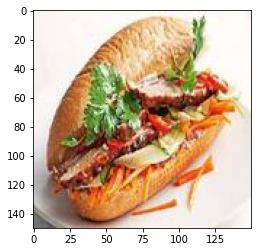

In [ ]:
img=load_img('/content/drive/MyDrive/btvn3/MON_AN/test/BANH MI/images (4).jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='BANH LOC'
elif round(result[0][1])==1:
  prediction='BANH MI'
elif round(result[0][2])==1:
  prediction='BANH XEO'
elif round(result[0][3])==1:
  prediction='BUN BO HUE'
elif round(result[0][4])==1:
  prediction='CA CHIEN'
elif round(result[0][5])==1:
  prediction='COM SUON'
elif round(result[0][6])==1:
  prediction='HEO QUAY'
elif round(result[0][7])==1:
  prediction='HU TIEU'
elif round(result[0][8])==1:
  prediction='THIT KHO TRUNG'
elif round(result[0][9])==1:
  prediction='TRUNG'
print(prediction)

BANH XEO


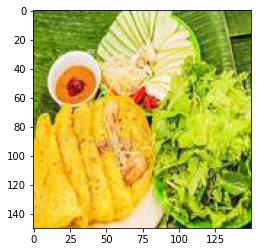

In [ ]:
img=load_img('/content/drive/MyDrive/btvn3/MON_AN/test/BANH XEO/images (31).jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='BANH LOC'
elif round(result[0][1])==1:
  prediction='BANH MI'
elif round(result[0][2])==1:
  prediction='BANH XEO'
elif round(result[0][3])==1:
  prediction='BUN BO HUE'
elif round(result[0][4])==1:
  prediction='CA CHIEN'
elif round(result[0][5])==1:
  prediction='COM SUON'
elif round(result[0][6])==1:
  prediction='HEO QUAY'
elif round(result[0][7])==1:
  prediction='HU TIEU'
elif round(result[0][8])==1:
  prediction='THIT KHO TRUNG'
elif round(result[0][9])==1:
  prediction='TRUNG'
print(prediction)

BUN BO HUE


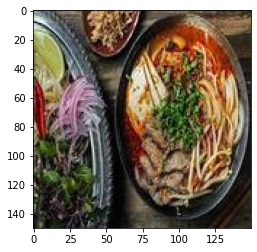

In [ ]:
img=load_img('/content/drive/MyDrive/btvn3/MON_AN/test/BUN BO HUE/images (4).jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='BANH LOC'
elif round(result[0][1])==1:
  prediction='BANH MI'
elif round(result[0][2])==1:
  prediction='BANH XEO'
elif round(result[0][3])==1:
  prediction='BUN BO HUE'
elif round(result[0][4])==1:
  prediction='CA CHIEN'
elif round(result[0][5])==1:
  prediction='COM SUON'
elif round(result[0][6])==1:
  prediction='HEO QUAY'
elif round(result[0][7])==1:
  prediction='HU TIEU'
elif round(result[0][8])==1:
  prediction='THIT KHO TRUNG'
elif round(result[0][9])==1:
  prediction='TRUNG'
print(prediction)

CA CHIEN


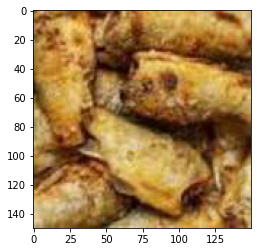

In [ ]:
img=load_img('/content/drive/MyDrive/btvn3/MON_AN/test/CA CHIEN/images (34).jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='BANH LOC'
elif round(result[0][1])==1:
  prediction='BANH MI'
elif round(result[0][2])==1:
  prediction='BANH XEO'
elif round(result[0][3])==1:
  prediction='BUN BO HUE'
elif round(result[0][4])==1:
  prediction='CA CHIEN'
elif round(result[0][5])==1:
  prediction='COM SUON'
elif round(result[0][6])==1:
  prediction='HEO QUAY'
elif round(result[0][7])==1:
  prediction='HU TIEU'
elif round(result[0][8])==1:
  prediction='THIT KHO TRUNG'
elif round(result[0][9])==1:
  prediction='TRUNG'
print(prediction)

COM SUON


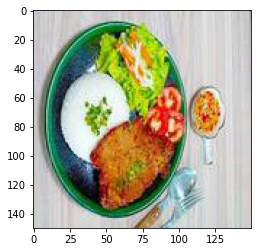

In [ ]:
img=load_img('/content/drive/MyDrive/btvn3/MON_AN/test/COM SUON/images (3).jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='BANH LOC'
elif round(result[0][1])==1:
  prediction='BANH MI'
elif round(result[0][2])==1:
  prediction='BANH XEO'
elif round(result[0][3])==1:
  prediction='BUN BO HUE'
elif round(result[0][4])==1:
  prediction='CA CHIEN'
elif round(result[0][5])==1:
  prediction='COM SUON'
elif round(result[0][6])==1:
  prediction='HEO QUAY'
elif round(result[0][7])==1:
  prediction='HU TIEU'
elif round(result[0][8])==1:
  prediction='THIT KHO TRUNG'
elif round(result[0][9])==1:
  prediction='TRUNG'
print(prediction)

HEO QUAY


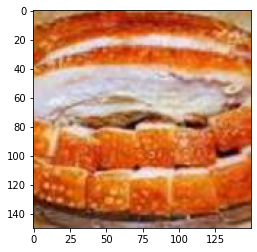

In [ ]:
img=load_img('/content/drive/MyDrive/btvn3/MON_AN/test/HEO QUAY/tải xuống (3).jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='BANH LOC'
elif round(result[0][1])==1:
  prediction='BANH MI'
elif round(result[0][2])==1:
  prediction='BANH XEO'
elif round(result[0][3])==1:
  prediction='BUN BO HUE'
elif round(result[0][4])==1:
  prediction='CA CHIEN'
elif round(result[0][5])==1:
  prediction='COM SUON'
elif round(result[0][6])==1:
  prediction='HEO QUAY'
elif round(result[0][7])==1:
  prediction='HU TIEU'
elif round(result[0][8])==1:
  prediction='THIT KHO TRUNG'
elif round(result[0][9])==1:
  prediction='TRUNG'
print(prediction)

HU TIEU


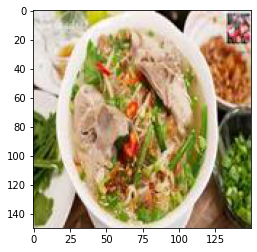

In [ ]:
img=load_img('/content/drive/MyDrive/btvn3/MON_AN/test/HU TIEU/images (3).jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='BANH LOC'
elif round(result[0][1])==1:
  prediction='BANH MI'
elif round(result[0][2])==1:
  prediction='BANH XEO'
elif round(result[0][3])==1:
  prediction='BUN BO HUE'
elif round(result[0][4])==1:
  prediction='CA CHIEN'
elif round(result[0][5])==1:
  prediction='COM SUON'
elif round(result[0][6])==1:
  prediction='HEO QUAY'
elif round(result[0][7])==1:
  prediction='HU TIEU'
elif round(result[0][8])==1:
  prediction='THIT KHO TRUNG'
elif round(result[0][9])==1:
  prediction='TRUNG'
print(prediction)

THIT KHO TRUNG


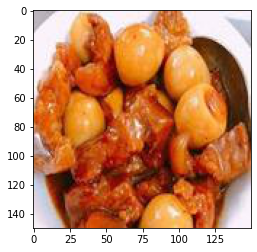

In [ ]:
img=load_img('/content/drive/MyDrive/btvn3/MON_AN/test/THIT KHO TRUNG/images (2).jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='BANH LOC'
elif round(result[0][1])==1:
  prediction='BANH MI'
elif round(result[0][2])==1:
  prediction='BANH XEO'
elif round(result[0][3])==1:
  prediction='BUN BO HUE'
elif round(result[0][4])==1:
  prediction='CA CHIEN'
elif round(result[0][5])==1:
  prediction='COM SUON'
elif round(result[0][6])==1:
  prediction='HEO QUAY'
elif round(result[0][7])==1:
  prediction='HU TIEU'
elif round(result[0][8])==1:
  prediction='THIT KHO TRUNG'
elif round(result[0][9])==1:
  prediction='TRUNG'
print(prediction)

TRUNG CHIEN


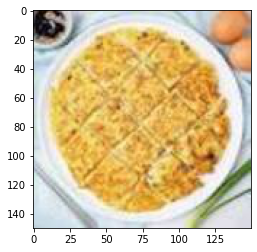

In [ ]:
img=load_img('/content/drive/MyDrive/btvn3/MON_AN/test/TRUNG/images (2).jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='BANH LOC'
elif round(result[0][1])==1:
  prediction='BANH MI'
elif round(result[0][2])==1:
  prediction='BANH XEO'
elif round(result[0][3])==1:
  prediction='BUN BO HUE'
elif round(result[0][4])==1:
  prediction='CA CHIEN'
elif round(result[0][5])==1:
  prediction='COM SUON'
elif round(result[0][6])==1:
  prediction='HEO QUAY'
elif round(result[0][7])==1:
  prediction='HU TIEU'
elif round(result[0][8])==1:
  prediction='THIT KHO TRUNG'
elif round(result[0][9])==1:
  prediction='TRUNG CHIEN'
print(prediction)

In [ ]:
Score=model.evaluate(validation_data,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 0.14887134730815887
Test accuary 0.9634146094322205
